<a href="https://colab.research.google.com/github/AiSitii/Tugas-NLP-kelompok-3-/blob/main/10222025_aisiti_TM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
csv_path = '/content/drive/MyDrive/Reviews.csv'

In [4]:
import pandas as pd

csv_path = '/content/drive/MyDrive/Reviews.csv'

df = pd.read_csv(csv_path)

print("✅ Dataset berhasil dimuat.")
print("Ukuran dataset:", df.shape)
df.head()


✅ Dataset berhasil dimuat.
Ukuran dataset: (568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
print("Nama kolom dalam dataset:")
for i, col in enumerate(df.columns):
    print(f"{i+1}. {col}")

Nama kolom dalam dataset:
1. Id
2. ProductId
3. UserId
4. ProfileName
5. HelpfulnessNumerator
6. HelpfulnessDenominator
7. Score
8. Time
9. Summary
10. Text


Jumlah baris: 568454
Jumlah kolom: 10

Panjang rata-rata teks (karakter): 436.22
Panjang median teks (karakter): 302.0

Jumlah baris duplikat: 0

Jumlah data kosong per kolom:
Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
text_length                0
dtype: int64




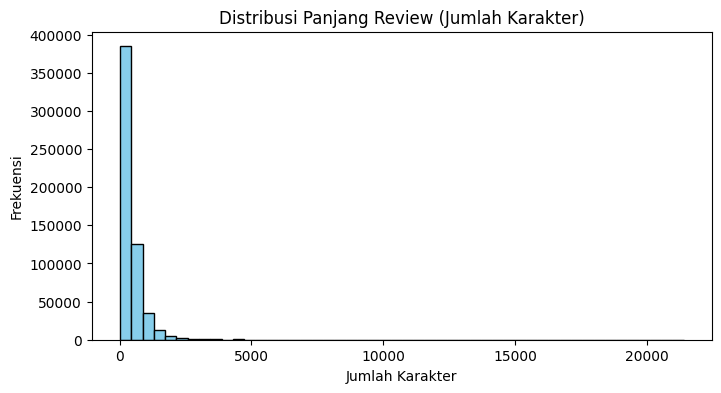

/tmp/ipython-input-161452926.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Score', data=df, palette='Set2')


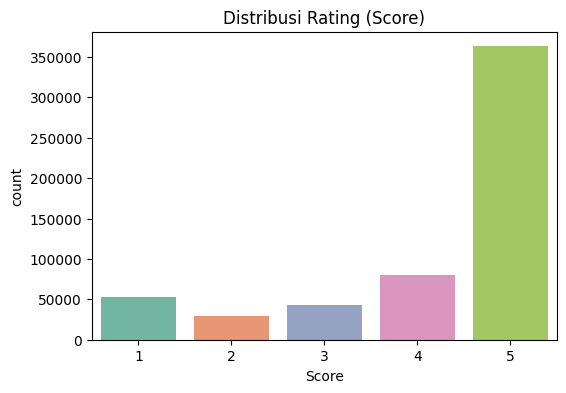

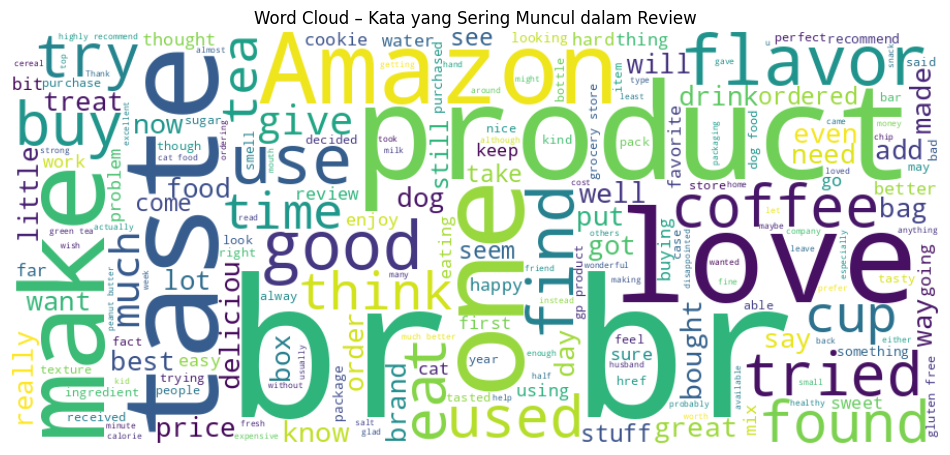

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Pilih kolom teks
text_col = 'Text'

# 1. Jumlah baris dan kolom
rows, cols = df.shape
print(f"Jumlah baris: {rows}")
print(f"Jumlah kolom: {cols}\n")

# 2. Panjang rata-rata teks per baris
df[text_col] = df[text_col].astype(str)
df['text_length'] = df[text_col].apply(len)
print(f"Panjang rata-rata teks (karakter): {round(df['text_length'].mean(), 2)}")
print(f"Panjang median teks (karakter): {df['text_length'].median()}\n")

# 3. Jumlah data duplikat
dupes = df.duplicated().sum()
print(f"Jumlah baris duplikat: {dupes}\n")

# 4. Jumlah data kosong per kolom
print("Jumlah data kosong per kolom:")
print(df.isnull().sum())
print("\n")

# 5. Visualisasi

## a. Distribusi panjang teks
plt.figure(figsize=(8,4))
plt.hist(df['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribusi Panjang Review (Jumlah Karakter)')
plt.xlabel('Jumlah Karakter')
plt.ylabel('Frekuensi')
plt.show()

## b. Distribusi rating (Score)
plt.figure(figsize=(6,4))
sns.countplot(x='Score', data=df, palette='Set2')
plt.title('Distribusi Rating (Score)')
plt.show()

## c. WordCloud kata yang sering muncul
text_data = " ".join(df[text_col].astype(str))
wordcloud = WordCloud(width=900, height=400, background_color='white', max_words=200).generate(text_data)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud – Kata yang Sering Muncul dalam Review')
plt.show()


In [8]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

print("✅ Library NLP siap digunakan.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


✅ Library NLP siap digunakan.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['Text'].astype(str).apply(clean_text)
print("✅ Contoh hasil cleaning:")
df[['Text', 'clean_text']].head()

✅ Contoh hasil cleaning:


,Text,clean_text
0,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...
2,This is a confection that has been around a fe...,this is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wide ...


In [11]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')   # tambahan baru
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
from nltk.tokenize import word_tokenize

df['tokens'] = df['clean_text'].apply(word_tokenize)
print("✅ Contoh hasil tokenisasi:")
print(df['tokens'].head(3).tolist())

✅ Contoh hasil tokenisasi:
[['i', 'have', 'bought', 'several', 'of', 'the', 'vitality', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them', 'all', 'to', 'be', 'of', 'good', 'quality', 'the', 'product', 'looks', 'more', 'like', 'a', 'stew', 'than', 'a', 'processed', 'meat', 'and', 'it', 'smells', 'better', 'my', 'labrador', 'is', 'finicky', 'and', 'she', 'appreciates', 'this', 'product', 'better', 'than', 'most'], ['product', 'arrived', 'labeled', 'as', 'jumbo', 'salted', 'peanutsthe', 'peanuts', 'were', 'actually', 'small', 'sized', 'unsalted', 'not', 'sure', 'if', 'this', 'was', 'an', 'error', 'or', 'if', 'the', 'vendor', 'intended', 'to', 'represent', 'the', 'product', 'as', 'jumbo'], ['this', 'is', 'a', 'confection', 'that', 'has', 'been', 'around', 'a', 'few', 'centuries', 'it', 'is', 'a', 'light', 'pillowy', 'citrus', 'gelatin', 'with', 'nuts', 'in', 'this', 'case', 'filberts', 'and', 'it', 'is', 'cut', 'into', 'tiny', 'squares', 'and', 'then', 'liberally', 'coate

In [13]:
from nltk.corpus import stopwords

# Ambil daftar stopwords bahasa Inggris
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Terapkan ke kolom tokens
df['tokens_no_stop'] = df['tokens'].apply(remove_stopwords)

print("✅ Contoh setelah stopword dihapus:")
print(df['tokens_no_stop'].head(3).tolist())

✅ Contoh setelah stopword dihapus:
[['bought', 'several', 'vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'labrador', 'finicky', 'appreciates', 'product', 'better'], ['product', 'arrived', 'labeled', 'jumbo', 'salted', 'peanutsthe', 'peanuts', 'actually', 'small', 'sized', 'unsalted', 'sure', 'error', 'vendor', 'intended', 'represent', 'product', 'jumbo'], ['confection', 'around', 'centuries', 'light', 'pillowy', 'citrus', 'gelatin', 'nuts', 'case', 'filberts', 'cut', 'tiny', 'squares', 'liberally', 'coated', 'powdered', 'sugar', 'tiny', 'mouthful', 'heaven', 'chewy', 'flavorful', 'highly', 'recommend', 'yummy', 'treat', 'familiar', 'story', 'cs', 'lewis', 'lion', 'witch', 'wardrobe', 'treat', 'seduces', 'edmund', 'selling', 'brother', 'sisters', 'witch']]


In [14]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['lemmatized'] = df['tokens_no_stop'].apply(lemmatize_tokens)

print("✅ Contoh hasil lemmatization:")
print(df['lemmatized'].head(3).tolist())

✅ Contoh hasil lemmatization:
[['bought', 'several', 'vitality', 'canned', 'dog', 'food', 'product', 'found', 'good', 'quality', 'product', 'look', 'like', 'stew', 'processed', 'meat', 'smell', 'better', 'labrador', 'finicky', 'appreciates', 'product', 'better'], ['product', 'arrived', 'labeled', 'jumbo', 'salted', 'peanutsthe', 'peanut', 'actually', 'small', 'sized', 'unsalted', 'sure', 'error', 'vendor', 'intended', 'represent', 'product', 'jumbo'], ['confection', 'around', 'century', 'light', 'pillowy', 'citrus', 'gelatin', 'nut', 'case', 'filbert', 'cut', 'tiny', 'square', 'liberally', 'coated', 'powdered', 'sugar', 'tiny', 'mouthful', 'heaven', 'chewy', 'flavorful', 'highly', 'recommend', 'yummy', 'treat', 'familiar', 'story', 'c', 'lewis', 'lion', 'witch', 'wardrobe', 'treat', 'seduces', 'edmund', 'selling', 'brother', 'sister', 'witch']]


In [15]:
df['normalized_text'] = df['lemmatized'].apply(lambda x: ' '.join(x))
print("✅ Contoh hasil normalisasi teks:")
df[['clean_text', 'normalized_text']].head(3)

✅ Contoh hasil normalisasi teks:


,clean_text,normalized_text
0,i have bought several of the vitality canned d...,bought several vitality canned dog food produc...
1,product arrived labeled as jumbo salted peanut...,product arrived labeled jumbo salted peanutsth...
2,this is a confection that has been around a fe...,confection around century light pillowy citrus...


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df['normalized_text'])

print("✅ TF-IDF selesai dibuat")
print("Ukuran matrix:", X.shape)

✅ TF-IDF selesai dibuat
Ukuran matrix: (568454, 2000)


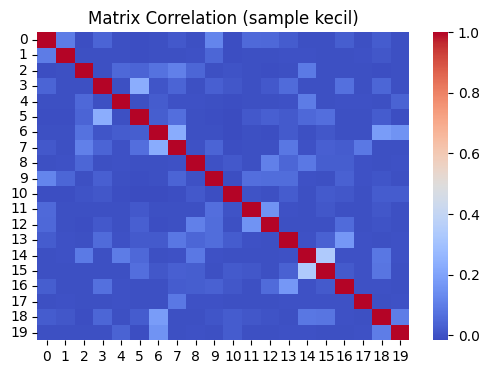

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sample = X[:300].toarray()  # ambil 300 dokumen pertama
corr_matrix = np.corrcoef(sample)

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix[:20, :20], cmap='coolwarm')
plt.title('Matrix Correlation (sample kecil)')
plt.show()

In [19]:
from sklearn.decomposition import LatentDirichletAllocation

sample_size = 3000
X_sample = X[:sample_size]

# 🔹 Inisialisasi model LDA
lda_model = LatentDirichletAllocation(
    n_components=5,       # jumlah topik
    max_iter=10,          # iterasi kecil supaya cepat
    learning_method='online',
    random_state=42,
    n_jobs=-1             # gunakan semua core CPU
)

# 🔹 Fit-transform hanya pada sample
lda_topics = lda_model.fit_transform(X_sample)

print("✅ Model LDA selesai dibuat (pakai sample data)")
print("Ukuran matriks topik:", lda_topics.shape)

✅ Model LDA selesai dibuat (pakai sample data)
Ukuran matriks topik: (3000, 5)


In [20]:
import numpy as np

n_top_words = 10
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda_model.components_):
    print(f"\n🧠 Topik {topic_idx+1}:")
    top_features_idx = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [feature_names[i] for i in top_features_idx]
    print(", ".join(top_features))


🧠 Topik 1:
tea, coffee, food, product, like, dog, great, good, taste, one

🧠 Topik 2:
em, lasted, theyd, pull, theyve, slow, fault, wanting, pricing, freeze

🧠 Topik 3:
oreo, dented, italian, enjoys, salmon, stew, pork, prevent, frozen, slow

🧠 Topik 4:
chip, flavor, like, good, great, br, bag, taste, love, potato

🧠 Topik 5:
timely, manner, espresso, dust, italian, bay, hazelnut, lived, cappuccino, pill


📊 Distribusi Jumlah Dokumen per Topik:
     Topik  Jumlah Dokumen
0  Topik 1            1049
1  Topik 2               2
2  Topik 3            1948
3  Topik 4               1


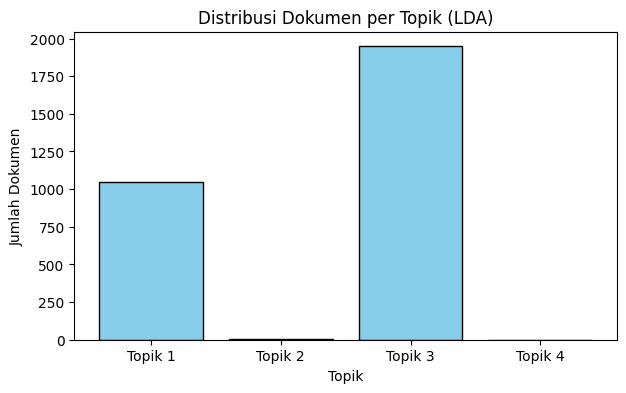

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

dominant_topic = np.argmax(lda_topics, axis=1)

topic_dist = pd.Series(dominant_topic).value_counts().sort_index()
topic_df = pd.DataFrame({
    "Topik": [f"Topik {i+1}" for i in range(len(topic_dist))],
    "Jumlah Dokumen": topic_dist.values
})

print("📊 Distribusi Jumlah Dokumen per Topik:")
print(topic_df)

# Visualisasi bar chart
plt.figure(figsize=(7,4))
plt.bar(topic_df["Topik"], topic_df["Jumlah Dokumen"], color="skyblue", edgecolor="black")
plt.title("Distribusi Dokumen per Topik (LDA)")
plt.xlabel("Topik")
plt.ylabel("Jumlah Dokumen")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


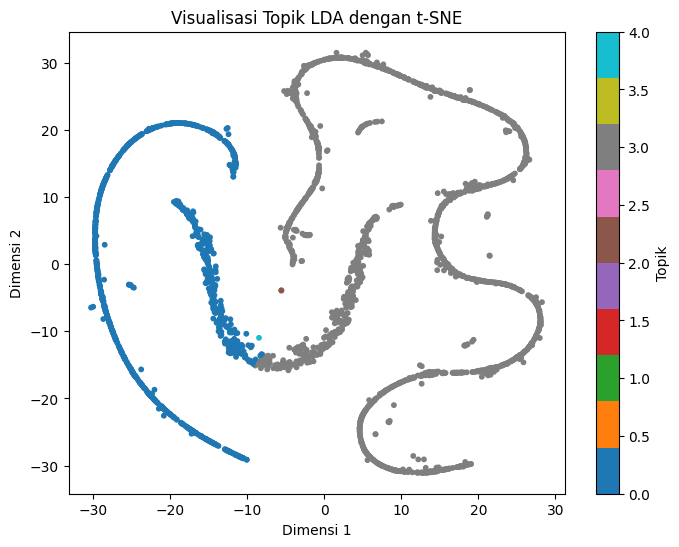

In [23]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA untuk reduksi awal (dari 5 → 2 dimensi)
X_pca = PCA(n_components=2).fit_transform(lda_topics)

# t-SNE untuk visualisasi yang lebih baik
tsne_model = TSNE(n_components=2, perplexity=50, random_state=42, n_iter=500)
tsne_lda = tsne_model.fit_transform(X_pca)

# Plot hasilnya
plt.figure(figsize=(8,6))
plt.scatter(tsne_lda[:,0], tsne_lda[:,1], c=dominant_topic, cmap='tab10', s=10)
plt.colorbar(label="Topik")
plt.title("Visualisasi Topik LDA dengan t-SNE")
plt.xlabel("Dimensi 1")
plt.ylabel("Dimensi 2")
plt.show()